### Question: What is the typical age and gender for users of different social media platforms and how does their average screen time compare?

#### Hypothesis 2: Age and Gender will significantly influence which social media platform people use thus affecting screen time. 



In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
pd.set_option('display.max_rows', 50)


In [118]:
df1=pd.read_csv('socialmedia_clean.csv')
df1.head()


,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [119]:
screen_social = df1[['Age','Gender','Daily_Screen_Time(hrs)','Social_Media_Platform']]
screen_social.head(10)
#created subset of df with variables of interest 

,Age,Gender,Daily_Screen_Time(hrs),Social_Media_Platform
0,44,Male,3.1,Facebook
1,30,Other,5.1,LinkedIn
2,23,Other,7.4,YouTube
3,36,Female,5.7,TikTok
4,34,Female,7.0,X (Twitter)
5,38,Male,6.6,LinkedIn
6,26,Female,7.8,TikTok
7,26,Female,7.4,Instagram
8,39,Male,4.7,YouTube
9,39,Female,6.6,Facebook


In [120]:
screen_social.describe()

,Age,Daily_Screen_Time(hrs)
count,500.000000,500.000000
mean,32.988000,5.530000
std,9.960637,1.734877
min,16.000000,1.000000
25%,24.000000,4.300000
50%,34.000000,5.600000
75%,41.000000,6.700000
max,49.000000,10.800000


In [121]:
screen_social[['Age','Daily_Screen_Time(hrs)']].corr()
#not showing a strong positive correlation between age and daily screen time

,Age,Daily_Screen_Time(hrs)
Age,1.000000,0.023505
Daily_Screen_Time(hrs),0.023505,1.000000


<Axes: >

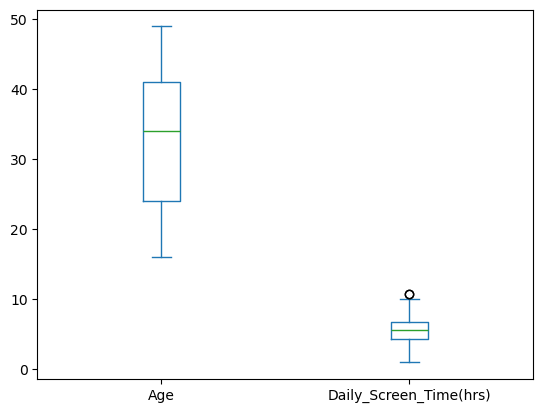

In [122]:
screen_social[['Age','Daily_Screen_Time(hrs)']].plot(kind='box')
# No extreme outliers displayed for age, where median falls at roughly 34/35. 

In [185]:
screen_social.value_counts('Social_Media_Platform')
# Using.value_counts we can see the type of social media platform used and how many people use a particular platform. Tiktok highest num of users. 


Social_Media_Platform
TikTok         95
X (Twitter)    88
LinkedIn       87
Facebook       81
YouTube        75
Instagram      74
Name: count, dtype: int64

In [124]:
screen_social.nunique()

Age                       34
Gender                     3
Daily_Screen_Time(hrs)    82
Social_Media_Platform      6
dtype: int64

The above results don't provide much insight apart from the most used social media platform in the data set. We want to see whether Age and Gender influence social media platform choice and daily screen time. We will investigate below.
We will be feature engineering a new column to ensure a tidier look to data when analysing. 


In [164]:
screen_social.loc[:,'Age_Group'] = pd.cut(screen_social['Age'],
                                    bins=[15,20,25,35,49],
                                    labels=['Teen','Young Adult', 'Adult', 'Older Adult'])
screen_social.head()

,Age,Gender,Daily_Screen_Time(hrs),Social_Media_Platform,Age_Group
0,44,Male,3.1,Facebook,Older Adult
1,30,Other,5.1,LinkedIn,Adult
2,23,Other,7.4,YouTube,Young Adult
3,36,Female,5.7,TikTok,Older Adult
4,34,Female,7.0,X (Twitter),Adult


In [167]:
#checking for any NaN values after creating feature 
screen_social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     500 non-null    int64   
 1   Gender                  500 non-null    object  
 2   Daily_Screen_Time(hrs)  500 non-null    float64 
 3   Social_Media_Platform   500 non-null    object  
 4   Age_Group               500 non-null    category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 16.4+ KB


In [149]:
screen_social.groupby('Social_Media_Platform').Age_Group.value_counts()

Social_Media_Platform  Age_Group  
Facebook               Older Adult    38
                       Adult          26
                       Young Adult     9
                       Teen            4
Instagram              Older Adult    36
                       Adult          21
                       Teen            7
                       Young Adult     7
LinkedIn               Older Adult    47
                       Adult          18
                       Young Adult    11
                       Teen           10
TikTok                 Older Adult    45
                       Adult          25
                       Teen           11
                       Young Adult    11
X (Twitter)            Adult          27
                       Older Adult    26
                       Young Adult    17
                       Teen           16
YouTube                Older Adult    34
                       Adult          17
                       Teen           10
                      

<Axes: xlabel='Social_Media_Platform', ylabel='count'>

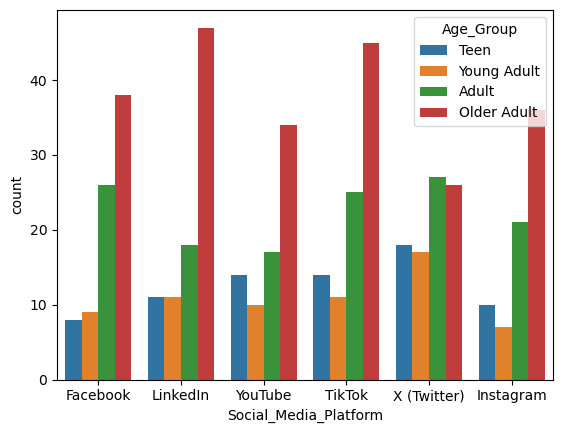

In [321]:
sns.countplot(x='Social_Media_Platform',hue= 'Age_Group', data = screen_social)


1. What is the typical age for each social media platform. 
2. For each social media platform, what is the screen time for those ages? 

In [325]:
mean_1 = screen_social.groupby('Social_Media_Platform')['Age'].mean()
mean_1

Social_Media_Platform
Facebook       33.728395
Instagram      34.297297
LinkedIn       34.402299
TikTok         32.989474
X (Twitter)    30.193182
YouTube        32.533333
Name: Age, dtype: float64

In [326]:
mean_2 = screen_social.groupby('Social_Media_Platform')['Daily_Screen_Time(hrs)'].mean()
mean_2

Social_Media_Platform
Facebook       5.658025
Instagram      6.079730
LinkedIn       5.291954
TikTok         5.457895
X (Twitter)    5.306818
YouTube        5.478667
Name: Daily_Screen_Time(hrs), dtype: float64

In [ ]:
fig, axs = plt.subplots(1,2), figsize =9,3)
axs[0,0].plot(x,y)
axs[0,0].set_title('

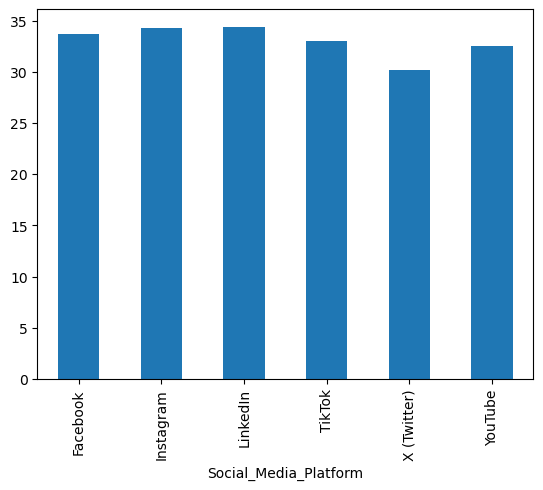

In [231]:
screen_social.groupby('Social_Media_Platform')['Age'].mean().plot(kind= 'bar'),
xlabel='Social Media Platform'
ylabel=('Age')
title = 'Average age per social Media Platform'
plt.show()
#see that the average age using social media is 33 years old.
#label y label as age (maybe using 



In [156]:
screen_social['Daily_Screen_Time(hrs)'].nsmallest()

39     1.0
94     1.0
282    1.5
378    1.5
294    1.7
Name: Daily_Screen_Time(hrs), dtype: float64

In [ ]:
#find max screen time hours by age group
#find min screen time hours by age group 

This has counted the amount of hours spent on social media and also social media plaform by age 

In [254]:
gender_social=screen_social[['Gender','Daily_Screen_Time(hrs)','Social_Media_Platform']]
gender_social.head()

,Gender,Daily_Screen_Time(hrs),Social_Media_Platform
0,Male,3.1,Facebook
1,Other,5.1,LinkedIn
2,Other,7.4,YouTube
3,Female,5.7,TikTok
4,Female,7.0,X (Twitter)


In [255]:
#Overview of type of social media platform used by gender 
gender_social.groupby(['Social_Media_Platform','Gender'])['Daily_Screen_Time(hrs)'].mean()

Social_Media_Platform  Gender
Facebook               Female    5.782609
                       Male      5.520588
                       Other     4.600000
Instagram              Female    6.177778
                       Male      5.995455
                       Other     6.433333
LinkedIn               Female    5.156818
                       Male      5.405128
                       Other     5.675000
TikTok                 Female    5.406818
                       Male      5.464583
                       Other     6.100000
X (Twitter)            Female    5.122222
                       Male      5.650000
                       Other     3.783333
YouTube                Female    5.634375
                       Male      5.451351
                       Other     4.816667
Name: Daily_Screen_Time(hrs), dtype: float64

In [262]:
gender_social.head()

,Gender,Daily_Screen_Time(hrs),Social_Media_Platform
0,Male,3.1,Facebook
1,Other,5.1,LinkedIn
2,Other,7.4,YouTube
3,Female,5.7,TikTok
4,Female,7.0,X (Twitter)


In [283]:
gender_social.nlargest(15,'Daily_Screen_Time(hrs)')

,Gender,Daily_Screen_Time(hrs),Social_Media_Platform
248,Female,10.8,Instagram
325,Male,10.8,X (Twitter)
202,Female,10.0,TikTok
212,Female,9.8,LinkedIn
56,Female,9.7,Facebook
76,Female,9.7,LinkedIn
388,Male,9.7,TikTok
440,Female,9.5,YouTube
241,Male,9.4,Instagram
475,Female,9.3,Facebook


In [282]:
gender_social.nsmallest(10,'Daily_Screen_Time(hrs)')

,Gender,Daily_Screen_Time(hrs),Social_Media_Platform
39,Female,1.0,Facebook
94,Female,1.0,TikTok
282,Female,1.5,LinkedIn
378,Male,1.5,TikTok
294,Female,1.7,TikTok
324,Male,1.7,X (Twitter)
149,Female,1.8,LinkedIn
27,Female,2.0,Facebook
50,Female,2.0,X (Twitter)
260,Female,2.1,X (Twitter)


In [281]:
gender_social['Gender'].value_counts()

Gender
Male      248
Female    229
Other      23
Name: count, dtype: int64

In [329]:
gender_social.loc[gender_social['Gender']=='Male'].head()

,Gender,Daily_Screen_Time(hrs),Social_Media_Platform
0,Male,3.1,Facebook
5,Male,6.6,LinkedIn
8,Male,4.7,YouTube
14,Male,6.3,X (Twitter)
17,Male,5.4,TikTok


In [328]:
gender_social.loc[gender_social['Gender']=='Female'].head()

,Gender,Daily_Screen_Time(hrs),Social_Media_Platform
3,Female,5.7,TikTok
4,Female,7.0,X (Twitter)
6,Female,7.8,TikTok
7,Female,7.4,Instagram
9,Female,6.6,Facebook


In [327]:
gender_social.loc[gender_social['Gender']=='Other'].head()

,Gender,Daily_Screen_Time(hrs),Social_Media_Platform
1,Other,5.1,LinkedIn
2,Other,7.4,YouTube
11,Other,5.4,Instagram
21,Other,6.4,TikTok
25,Other,5.7,X (Twitter)


## Visualisation

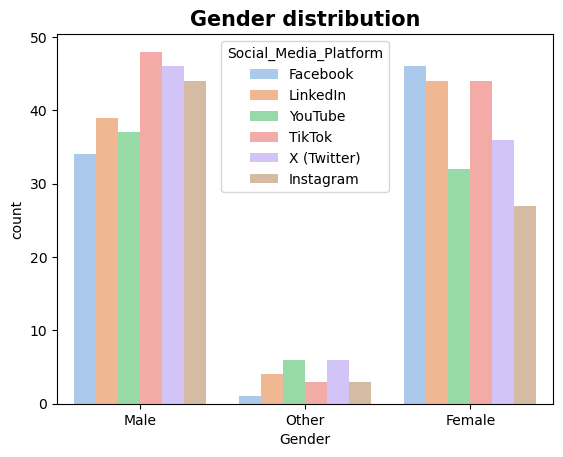

In [338]:
sns.countplot(x="Gender",data=screen_social, hue="Social_Media_Platform", palette="pastel")
plt.title("Gender distribution", fontsize =15, fontweight ="bold")
plt.show()

In [340]:
gender_social[['Social_Media_Platform','Gender']].describe()

,Social_Media_Platform,Gender
count,500,500
unique,6,3
top,TikTok,Male
freq,95,248


Text(0.5, 1.0, 'Gender: Daily Screen Time vs Social Media Platform')

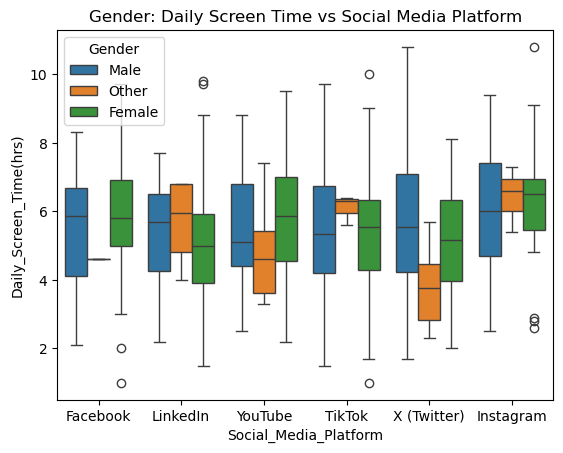

In [350]:
sns.boxplot(data= gender_social, x= 'Social_Media_Platform', y='Daily_Screen_Time(hrs)', hue= 'Gender')
plt.title("Gender: Daily Screen Time vs Social Media Platform")
